In [5]:
import numpy as np
import numdifftools as nd

In [45]:
def f(x):
    return (x[0]-x[1])**2 + (x[1]**3)

In [46]:
def BFGS(fun,x,alpha,nmax,tol = 1e-5):
    x_store=np.array([x])
    n = np.size(x)
    I = np.eye(n)
    g = nd.Gradient(fun)(x)
    G = I
    c = 0
    while c < nmax and np.linalg.norm(g) > tol:
        c += 1
        dx = np.matmul(G,g)
        x_n = x - alpha*dx
        g_n = nd.Gradient(fun)(x_n)
        y = g_n - g
        s = -alpha*dx
        t1 =  I - np.matmul(np.transpose([s]),[y])/np.matmul([y],np.transpose([s]))
        t2 = I - np.matmul(np.transpose([y]),[s])/np.matmul([y],np.transpose([s]))
        t3 =  np.matmul(np.transpose([s]),[s])/np.matmul([y],np.transpose([s]))
        G = np.matmul(np.matmul(t1,G),t2)+t3
        x = x_n
        x_store = np.append(x_store,[x],axis=0)
        g = g_n
    return(x_store, c)


In [47]:
x = [10,0]
X,c = BFGS(f,x,0.1,1000,tol = 1e-10)


In [48]:
x1 = np.linspace(min(X[:,0]-3),max(X[:,0]+3),30)
x2 = np.linspace(min(X[:,1]-3),max(X[:,1]+3),30)
X1,X2 = np.meshgrid(x1,x2)
Z = f([X1,X2])

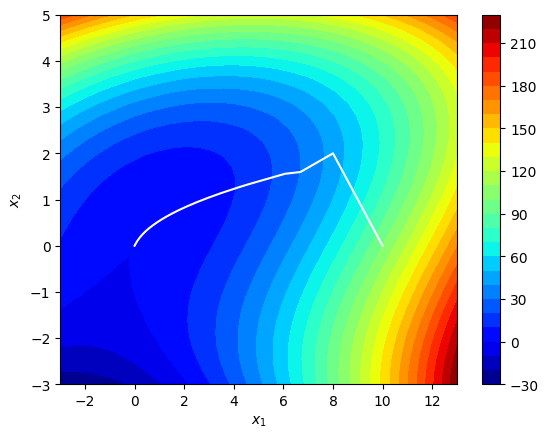

In [49]:
import matplotlib.pyplot as plt 

plt.figure()
plt.contourf(X1,X2,Z,30,cmap='jet')
plt.colorbar()
plt.plot(X[:,0],X[:,1],c='w')
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.show()